---
# Preparation and Reading the Data

In [10]:
# # Extract

# import os, zipfile

# dir_name = './'
# extension = ".zip"

# os.chdir(dir_name) # change directory from working dir to dir with files

# for item in os.listdir(dir_name): # loop through items in dir
#     if item.endswith(extension): # check for ".zip" extension
#         file_name = os.path.abspath(item) # get full path of files
#         zip_ref = zipfile.ZipFile(file_name) # create zipfile object
#         zip_ref.extractall(dir_name) # extract file to dir
#         zip_ref.close() # close file
#         os.remove(file_name) # delete zipped file

In [78]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np

file_names = ['EPA_OD_202201.csv', 'EPA_OD_202202.csv', 'EPA_OD_202203.csv', 'EPA_OD_202204.csv', 'EPA_OD_202205.csv', 
              'EPA_OD_202206.csv', 'EPA_OD_202207.csv', 'EPA_OD_202208.csv', 'EPA_OD_202209.csv', 'EPA_OD_202210.csv']
data = pd.concat((pd.read_csv(i) for i in file_names)).reset_index(drop=True)
# df_test = pd.read_csv('Sample_Submission_new.csv')


/tmp/ipykernel_1577294/3338833885.py:7: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.concat((pd.read_csv(i) for i in file_names)).reset_index(drop=True)


In [79]:
data

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,PM10,PM10_AVG,PM2.5,PM2.5_AVG,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,SO2_AVG,Longitude,Latitude,SiteId
0,淡水,新北市,36.0,NaN,良好,0.5,0.2,0.2,41.4,39.0,13.0,14.0,5.0,7.0,2.9,4.2,1.3,NaN,NaN,2022-01-01 00:00:00,0.0,121.449239,25.164500,10
1,士林,臺北市,38.0,NaN,良好,0.8,0.19,0.2,43.6,41.0,8.0,14.0,2.0,5.0,4.9,6.0,1.1,1.1,172,2022-01-01 00:00:00,0.0,121.515389,25.105417,11
2,中山,臺北市,30.0,NaN,良好,0.5,0.32,0.3,32.6,25.0,15.0,21.0,5.0,9.0,12.1,13.9,1.7,2.7,114,2022-01-01 00:00:00,1.0,121.526528,25.062361,12
3,萬華,臺北市,34.0,NaN,良好,1.0,0.3,0.3,31.4,27.0,10.0,17.0,10.0,10.0,15.4,16.7,1.2,1.6,76,2022-01-01 00:00:00,1.0,121.507972,25.046503,13
4,古亭,臺北市,34.0,NaN,良好,1.3,0.22,0.2,36.6,37.0,10.0,16.0,7.0,10.0,8.9,9.7,0.7,1.4,93,2022-01-01 00:00:00,1.0,121.529556,25.020608,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825409,西屯,臺中市,31.0,NaN,良好,0.9,0.14,0.1,32.0,34.9,17.0,24.0,6.0,8.0,5.5,5.9,0.4,2.6,23,2022-10-28 00:00:00,1.0,120.616917,24.162197,32
825410,二林,彰化縣,38.0,NaN,良好,1.7,0.18,0.2,26.3,33.0,23.0,38.0,9.0,10.0,6.3,6.4,0.0,1.5,27,2022-10-28 00:00:00,2.0,120.409653,23.925175,35
825411,頭份,苗栗縣,31.0,NaN,良好,1.6,0.14,0.1,35.7,33.6,12.0,21.0,4.0,4.0,5.0,6.3,1.3,3,68,2022-10-28 00:00:00,1.0,120.898572,24.696969,25
825412,沙鹿,臺中市,29.0,NaN,良好,2.0,0.19,0.2,26.5,31.1,18.0,26.0,4.0,7.0,9.2,10.2,0.9,1.8,5,2022-10-28 00:00:00,2.0,120.568794,24.225628,29


---
# Data Exploration

In [80]:
data.index = pd.to_datetime(data['PublishTime'], format='%Y.%m.%d %H:%M:%S')

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 825414 entries, 2022-01-01 00:00:00 to 2022-10-28 00:00:00
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SiteName     825414 non-null  object 
 1   County       825414 non-null  object 
 2   AQI          823576 non-null  float64
 3   Pollutant    324908 non-null  object 
 4   Status       823837 non-null  object 
 5   SO2          808930 non-null  float64
 6   CO           815210 non-null  object 
 7   CO_8hr       822598 non-null  object 
 8   O3           808364 non-null  float64
 9   O3_8hr       818790 non-null  float64
 10  PM10         813846 non-null  float64
 11  PM10_AVG     821467 non-null  float64
 12  PM2.5        813881 non-null  float64
 13  PM2.5_AVG    821316 non-null  float64
 14  NO2          809198 non-null  float64
 15  NOx          809199 non-null  float64
 16  NO           809199 non-null  float64
 17  WindSpeed    319350 non-null  obj

In [82]:
cols = ['CO', 'CO_8hr', 'WindSpeed', 'WindDirec']

for i in cols:
    data[i] = data[i].replace('-', np.NaN)
    data[i] = data[i].astype(float)

In [83]:
data.isna().sum()

SiteName            0
County              0
AQI              1838
Pollutant      500506
Status           1577
SO2             16484
CO              17455
CO_8hr          10067
O3              17050
O3_8hr           6624
PM10            11568
PM10_AVG         3947
PM2.5           11533
PM2.5_AVG        4098
NO2             16216
NOx             16215
NO              16215
WindSpeed      514610
WindDirec      514577
PublishTime         0
SO2_AVG          6313
Longitude           0
Latitude            0
SiteId              0
dtype: int64

**A lot of missing values, especially for `Pollutant`, `WindSpeed`, and `WindDirec`.**

## Translate `SiteName`, `County`, `Status` into English for easier work.

In [84]:
county_ch = ['新北市', '臺北市', '桃園市', '新竹縣', '新竹市', '苗栗縣', '臺中市', '彰化縣', '南投縣',
       '雲林縣', '基隆市', '高雄市', '連江縣', '金門縣', '澎湖縣', '臺東縣', '宜蘭縣', '花蓮縣',
       '屏東縣', '嘉義縣', '嘉義市', '臺南市']
county_en = ['New Taipei City', 'Taipei City', 'Taoyuan City', 'Hsinchu County', 'Hsinchu City', 'Miaoli County', 'Taichung City', 'Changhua County', 'Nantou County',
        'Yunlin County', 'Keelung City', 'Kaohsiung City', 'Lianjiang County', 'Kinmen County', 'Penghu County', 'Taidong County', 'Yilan County', 'Hualien County',
        'Pingtung County', 'Chiayi County', 'Chiayi City', 'Tainan City']

site_ch = ['淡水', '士林', '中山', '萬華', '古亭', '松山', '大同', '桃園', '大園', '觀音', '平鎮',
       '龍潭', '湖口', '竹東', '新竹', '頭份', '苗栗', '三義', '豐原', '沙鹿', '大里', '忠明',
       '西屯', '彰化', '線西', '二林', '南投', '斗六', '基隆', '汐止', '萬里', '新店', '土城',
       '板橋', '新莊', '菜寮', '林口', '永和', '復興', '埔里', '馬祖', '金門', '馬公', '關山',
       '麥寮', '富貴角', '大寮', '竹山', '中壢', '三重', '冬山', '宜蘭', '陽明', '花蓮', '臺東',
       '恆春', '潮州', '屏東', '小港', '前鎮', '前金', '左營', '楠梓', '林園', '崙背', '新港',
       '朴子', '臺西', '嘉義', '新營', '善化', '安南', '臺南', '美濃', '橋頭', '仁武', '鳳山']
site_en = ['Danshui', 'Shilin', 'Zhongshan', 'Wanhua', 'Guting', 'Songshan', 'Datong', 'Taoyuan', 'Dayuan', 'Guanyin', 'Pingzhen',
        'Longtan', 'Hukou', 'Zhudong', 'Hsinchu', 'Toufen', 'Miaoli', 'Sanyi', 'Fengyuan', 'Shalu', 'Dali', 'Zhongming',
        'Xitun', 'Changhua', 'Xianxi', 'Erlin', 'Nantou', 'Douliu', 'Keelung', 'Xizhi', 'Wanli', 'Xindian', 'Tucheng',
        'Banqiao', 'Xinzhuang', 'Cailiao', 'Linkou', 'Yonghe', 'Fuxing', 'Puri', 'Matsu', 'Kinmen', 'Magong', 'Guanshan',
        'Mailiao', 'Fuguijiao', 'Daliao', 'Zhushan', 'Zhongli', 'Sanchong', 'Dongshan', 'Yilan', 'Yangming', 'Hualien', 'Taitung',
        'Hengchun', 'Chaozhou', 'Pingtung', 'Xiaogang', 'Qianzhen', 'Qianjin', 'Zuoying', 'Nanzi', 'Linyuan', 'Lunbei', 'Xingang ',
        'Puzi', 'Taixi', 'Chiayi', 'Xinying', 'Shanhua', 'Annan', 'Tainan', 'Meinong', 'Qiaotou', 'Renwu', 'Fengshan']

status_ch = ['良好', '普通', '對敏感族群不健康', '對所有族群不健康', '非常不健康']
status_en = ['good', 'normal', 'unhealthy for sensitive groups', 'unhealthy for all groups', 'very unhealthy']

pollutant_ch = ['細懸浮微粒', '二氧化氮', '懸浮微粒', '臭氧八小時', '二氧化硫', '臭氧']
pollutant_en = ['fine suspended particles', 'nitrogen dioxide', 'suspended particulates', 'ozone eight hours', 'sulfur dioxide', 'ozone']

county_dict = {county_ch[i]: county_en[i] for i in range(len(county_ch))}
site_dict = {site_ch[i]: site_en[i] for i in range(len(site_ch))}
status_dict = {status_ch[i]: status_en[i] for i in range(len(status_ch))}
pollutant_dict = {pollutant_ch[i]: pollutant_en[i] for i in range(len(pollutant_ch))}

data['SiteName'] = data['SiteName'].map(site_dict)
data['County'] = data['County'].map(county_dict)
data['Status'] = data['Status'].map(status_dict)
data['Pollutant'] = data['Pollutant'].map(pollutant_dict)

### NULL VALUES GROUPED BY SITE

In [85]:
pd.set_option('display.max_rows', 500)

data.drop('SiteName', 1).isna().groupby(data.SiteName, sort=True).sum().reset_index()

/tmp/ipykernel_1577294/4083817275.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop('SiteName', 1).isna().groupby(data.SiteName, sort=True).sum().reset_index()


,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,PM10,PM10_AVG,PM2.5,PM2.5_AVG,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,SO2_AVG,Longitude,Latitude,SiteId
0,Annan,0,4,4222,4,244,98,4,168,47,96,10,96,10,255,255,255,6464,6464,0,130,0,0,0
1,Banqiao,0,3,8342,3,278,105,13,227,114,111,5,117,5,161,161,161,6486,6486,0,170,0,0,0
2,Cailiao,0,9,7814,9,158,138,10,207,74,124,20,123,13,191,191,191,6495,6495,0,27,0,0,0
3,Changhua,0,2,6107,2,117,70,2,184,57,95,15,92,17,113,113,113,6463,6463,0,19,0,0,0
4,Chaozhou,0,13,3866,8,271,104,26,183,44,137,34,118,14,200,200,200,6419,6419,0,210,0,0,0
5,Chiayi,0,2,4095,2,125,88,2,169,10,139,29,122,43,201,201,201,6468,6468,0,2,0,0,0
6,Dali,0,6,5774,4,118,92,6,170,36,117,6,98,6,167,167,167,6489,6489,0,2,0,0,0
7,Daliao,0,20,2918,12,142,129,17,224,83,147,20,135,20,207,207,207,6450,6450,0,6,0,0,0
8,Danshui,0,5,8810,4,347,91,26,217,78,87,8,105,10,125,125,125,10172,10172,0,211,0,0,0
9,Datong,0,8,5303,6,163,138,6,248,118,127,12,114,12,197,197,197,10743,10743,0,28,0,0,0


---
# Yangming Station

In [86]:
data_yangming = data[data['SiteName'] == 'Yangming']
df_test = data_yangming['2022-09-20 06:00:00':'2022-10-04'][['SiteName', 'SiteId', 'PM2.5']]
# df_test['PM2.5'] = pd.concat([data_yangming['2022-09-29':'2022-09-30']['PM2.5'].tail(12), df_test['PM2.5']]).reset_index(drop = True)
data_yangming

,SiteName,County,AQI,Pollutant,Status,SO2,CO,CO_8hr,O3,O3_8hr,PM10,PM10_AVG,PM2.5,PM2.5_AVG,NO2,NOx,NO,WindSpeed,WindDirec,PublishTime,SO2_AVG,Longitude,Latitude,SiteId
PublishTime,,,,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,Yangming,Taipei City,42.0,NaN,good,1.0,0.18,0.1,46.4,45.0,3.0,5.0,1.0,3.0,0.9,1.5,0.5,NaN,NaN,2022-01-01 00:00:00,1.0,121.529583,25.182722,64
2022-01-01 00:00:00,Yangming,Taipei City,42.0,NaN,good,1.0,0.18,0.1,46.4,45.0,3.0,5.0,1.0,3.0,0.9,1.5,0.5,NaN,NaN,2022-01-01 00:00:00,1.0,121.529583,25.182722,64
2022-01-01 01:00:00,Yangming,Taipei City,42.0,NaN,good,0.7,0.18,0.1,46.1,45.0,4.0,4.0,4.0,3.0,0.7,1.3,0.6,NaN,NaN,2022-01-01 01:00:00,1.0,121.529583,25.182722,64
2022-01-01 01:00:00,Yangming,Taipei City,42.0,NaN,good,0.7,0.18,0.1,46.1,45.0,4.0,4.0,4.0,3.0,0.7,1.3,0.6,NaN,NaN,2022-01-01 01:00:00,1.0,121.529583,25.182722,64
2022-01-01 03:00:00,Yangming,Taipei City,43.0,NaN,good,0.7,0.22,0.1,45.8,46.0,2.0,4.0,0.0,2.0,1.2,2.0,0.8,NaN,NaN,2022-01-01 03:00:00,1.0,121.529583,25.182722,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-27 20:00:00,Yangming,Taipei City,37.0,NaN,good,0.4,0.13,0.1,39.6,40.5,11.0,10.0,1.0,1.0,0.4,0.6,0.1,NaN,NaN,2022-10-27 20:00:00,0.0,121.529583,25.182722,64
2022-10-27 21:00:00,Yangming,Taipei City,37.0,NaN,good,0.3,0.13,0.1,40.4,40.2,12.0,10.0,0.0,1.0,0.5,0.7,0.2,NaN,NaN,2022-10-27 21:00:00,0.0,121.529583,25.182722,64
2022-10-27 22:00:00,Yangming,Taipei City,37.0,NaN,good,0.3,0.13,0.1,40.0,40.2,10.0,10.0,0.0,1.0,0.5,0.7,0.1,NaN,NaN,2022-10-27 22:00:00,0.0,121.529583,25.182722,64


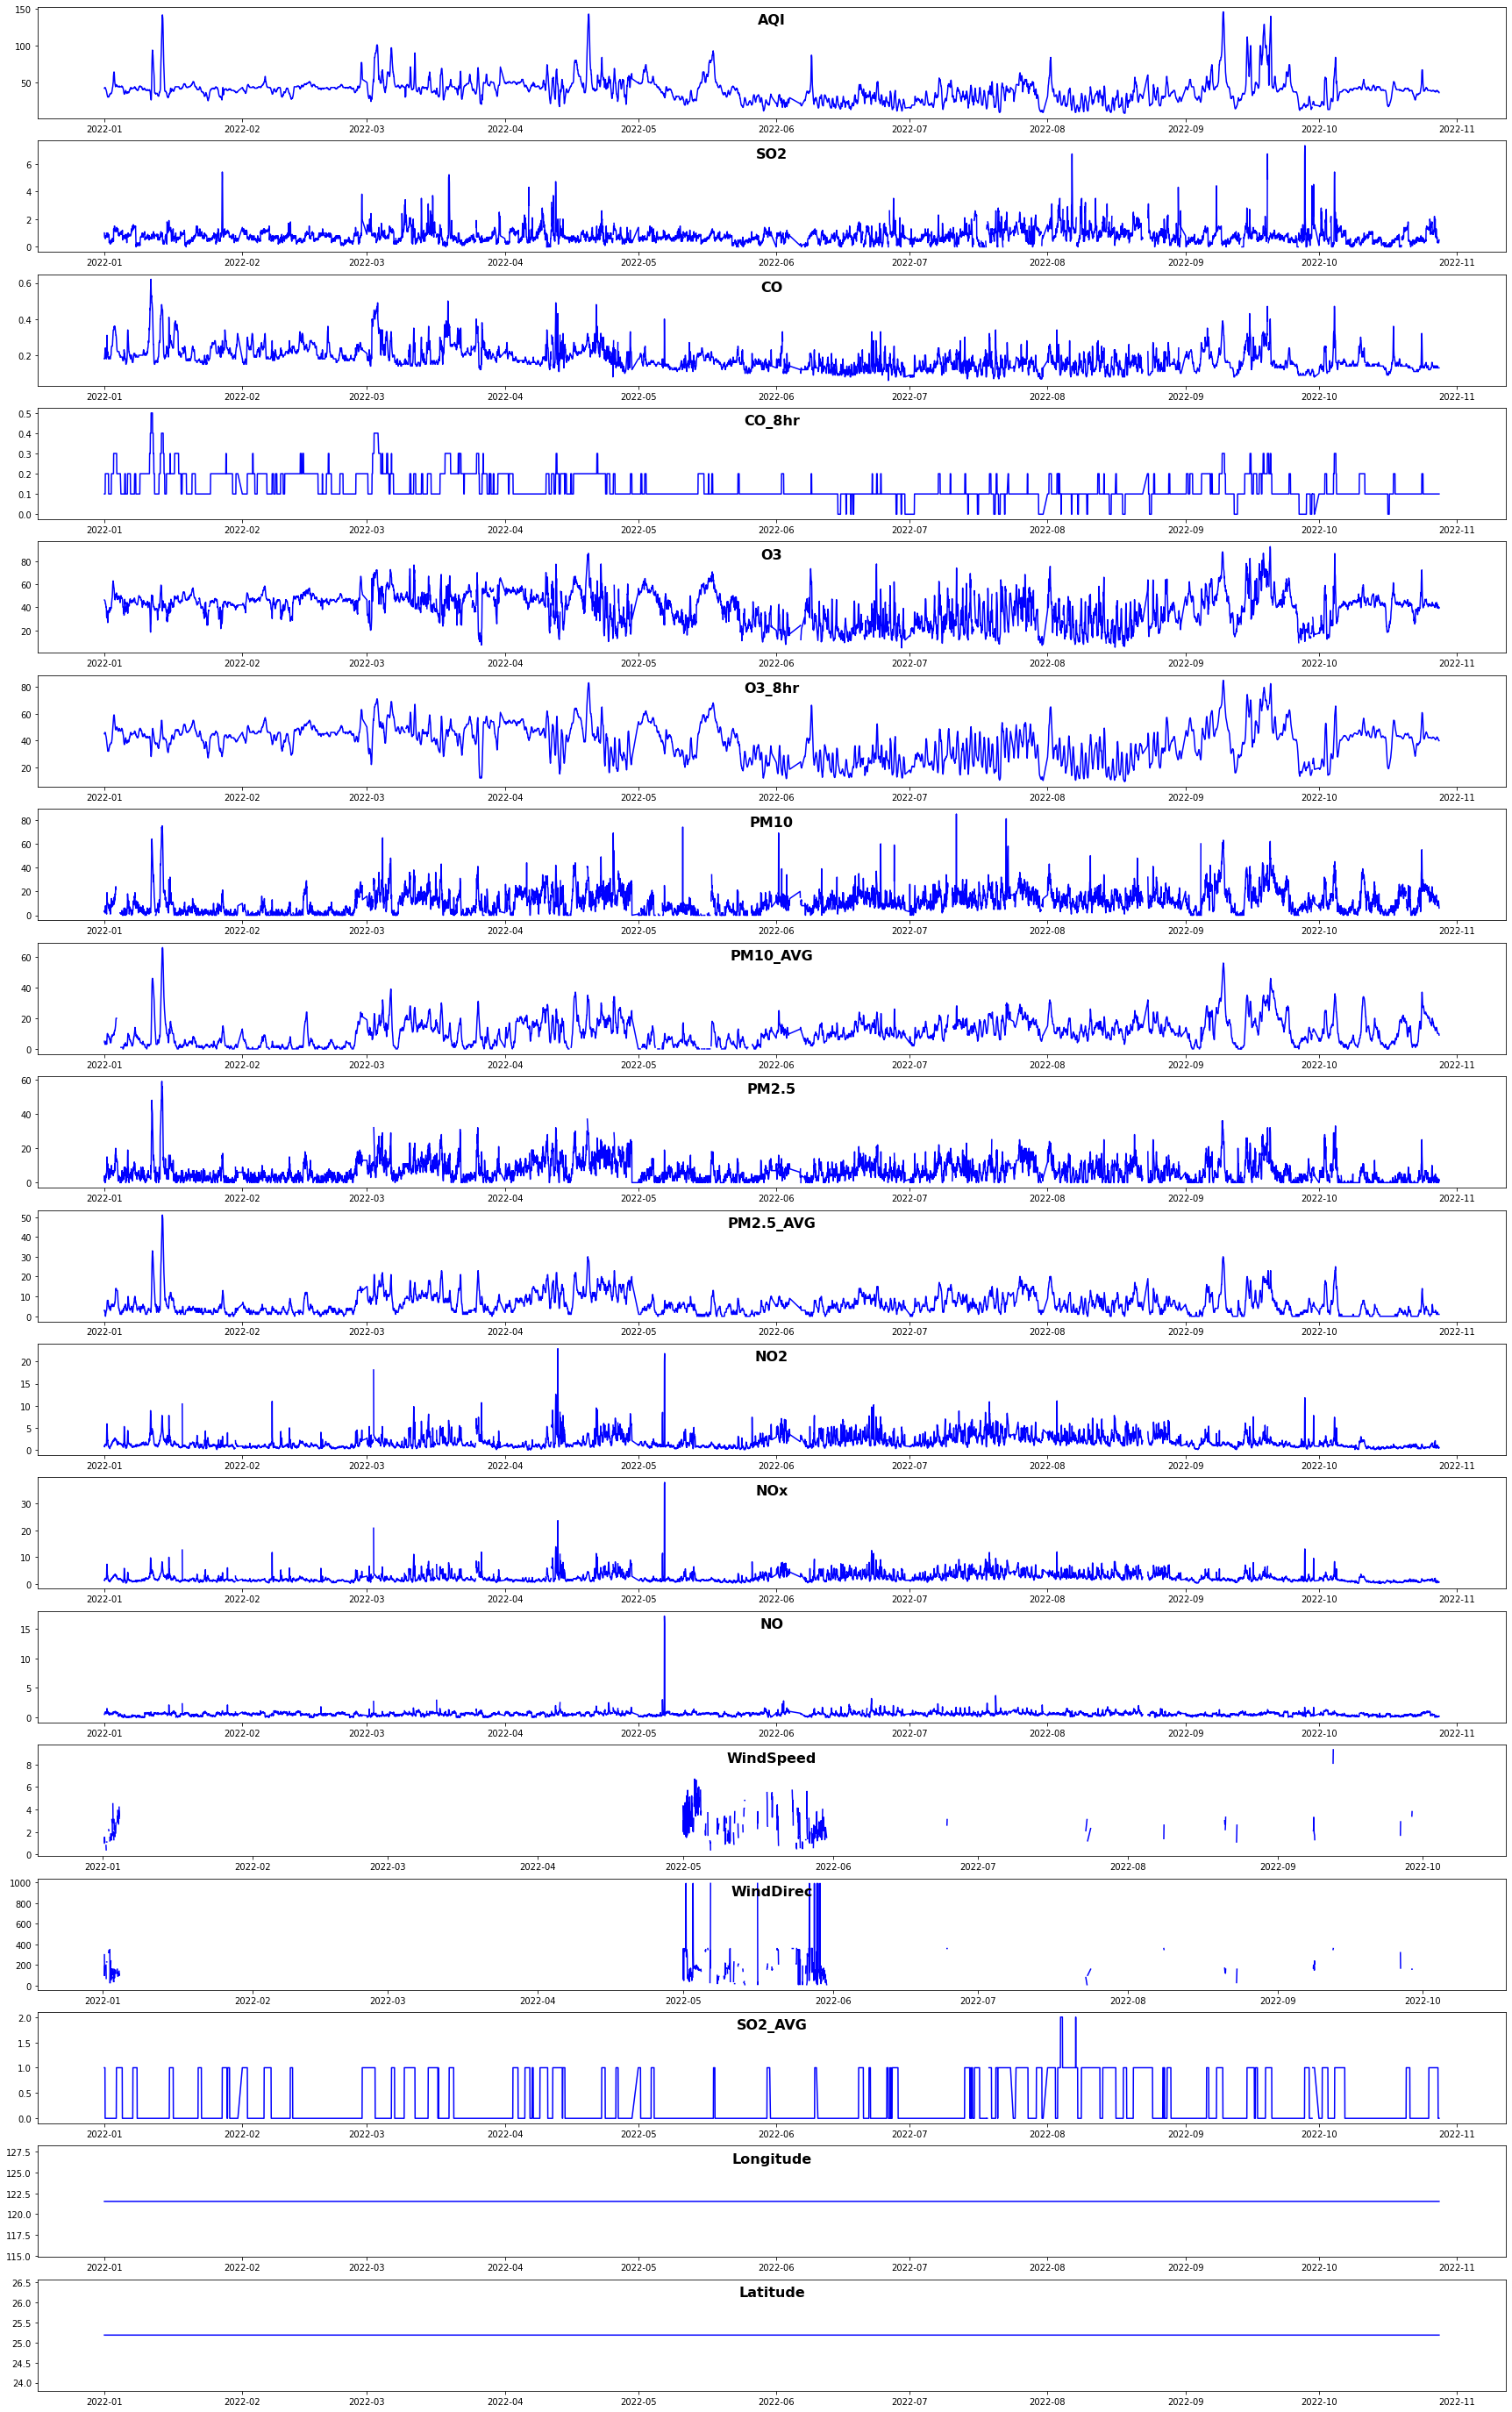

In [87]:
import matplotlib.pyplot as plt

values = data_yangming.values

col_idx = [2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22]
i = 1

plt.figure(figsize=(30,50))
for idx in col_idx:
    plt.subplot(len(col_idx), 1, i)
    plt.plot(data_yangming.index, values[:, idx], c='blue')
    plt.title(data_yangming.columns[idx], y=0.8, loc='center', fontsize=16, fontweight="bold")
    i+=1
plt.show()

In [88]:
data_yangming.isna().sum()

SiteName           0
County             0
AQI                2
Pollutant       9325
Status             2
SO2              145
CO                88
CO_8hr             2
O3               157
O3_8hr            23
PM10             293
PM10_AVG         300
PM2.5            100
PM2.5_AVG          2
NO2              113
NOx              113
NO               113
WindSpeed      10182
WindDirec      10182
PublishTime        0
SO2_AVG           13
Longitude          0
Latitude           0
SiteId             0
dtype: int64

In [89]:
# Drop Pollutant, since it has too many missing values
data_yangming.drop('Pollutant', axis=1, inplace=True)

/tmp/ipykernel_1577294/552385810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yangming.drop('Pollutant', axis=1, inplace=True)


<AxesSubplot:>

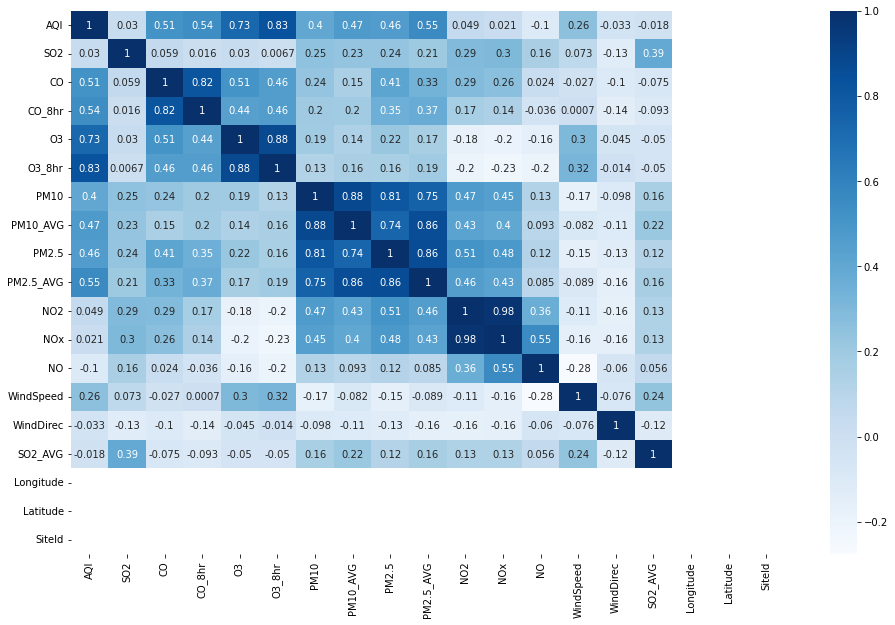

In [90]:
# Correlation
import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(data_yangming.corr(), annot=True, cmap='Blues')

It's interesting. Based on [this](http://iopscience.iop.org/article/10.1088/1755-1315/108/4/042047/pdf#:~:text=Of%20course%2C%20meteorological%20factors%2C%20such,5%20concentration.) journal article, `WindSpeed` is important factors which affect the changes of PM2.5. But in our data, the correlation is almost 0.

In [91]:
# Feature selection based on pearson correlation

cor = data_yangming.corr()
cor_target = abs(cor['PM2.5'])

thresh = 0.4
relevant_features = cor_target[cor_target>thresh]
relevant_features

AQI          0.464805
CO           0.413402
PM10         0.807477
PM10_AVG     0.738807
PM2.5        1.000000
PM2.5_AVG    0.862627
NO2          0.508465
NOx          0.481857
Name: PM2.5, dtype: float64

In [92]:
data_yangming = data_yangming[relevant_features.index]
data_yangming.isna().sum()

AQI            2
CO            88
PM10         293
PM10_AVG     300
PM2.5        100
PM2.5_AVG      2
NO2          113
NOx          113
dtype: int64

In [93]:
# Impute missing values with Exponential Weighted

for i in data_yangming.columns:
    ewm = data_yangming[i].ewm(halflife=4).mean()
    data_yangming[i] = data_yangming[i].fillna(ewm)
    
ewm = df_test['PM2.5'].ewm(halflife=4).mean()
df_test['PM2.5-cleaned'] =  df_test['PM2.5'].fillna(ewm)

/tmp/ipykernel_1577294/990222044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_yangming[i] = data_yangming[i].fillna(ewm)


In [94]:
print(data_yangming.isna().sum())
print(df_test.isna().sum())

AQI          0
CO           0
PM10         0
PM10_AVG     0
PM2.5        0
PM2.5_AVG    0
NO2          0
NOx          0
dtype: int64
SiteName         0
SiteId           0
PM2.5            5
PM2.5-cleaned    0
dtype: int64


---
# Univariate

In [102]:
# Data preprocessing
def df_to_X_y(df, window_size_in, window_size_out):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size_in):
        row = [[a] for a in df_as_np[i:i+window_size_in]]
        X.append(row)
        label = [[a] for a in df_as_np[i:i+window_size_out]]
        y.append(label)
    return np.array(X), np.array(y)

In [103]:
win_size_in = 96
win_size_out = 6
X, y = df_to_X_y(data_yangming['PM2.5'], win_size_in, win_size_out)
X_test, y_test = df_to_X_y(df_test['PM2.5-cleaned'], win_size_in, win_size_out)
X.shape, y.shape

((10629, 96, 1), (10629, 6, 1))

In [104]:
split = int(len(X)*0.9)
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]
X_train.shape, y_train.shape

((9566, 96, 1), (9566, 6, 1))

## Model

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error as mse
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [49]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  rmse = history.history['root_mean_squared_error']
  val_rmse = history.history['val_root_mean_squared_error']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, rmse, label='training_root_mean_squared_error')
  plt.plot(epochs, val_rmse, label='val_root_mean_squared_error')
  plt.title('RMSE')
  plt.xlabel('Epochs')
  plt.legend();

In [122]:
model1 = Sequential(
    [
        layers.InputLayer((win_size_in,1)),
        # layers.BatchNormalization(),
        layers.Conv1D(filters=win_size_in, kernel_size=6, strides=3, padding='valid'),
        layers.LSTM(256, return_sequences=True, activation='tanh'),
        layers.LSTM(128, activation='tanh'),
        # layers.Dropout(0.2),
        layers.Dense(win_size_out)
    ])

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 31, 96)            672       
                                                                 
 lstm_26 (LSTM)              (None, 31, 256)           361472    
                                                                 
 lstm_27 (LSTM)              (None, 128)               197120    
                                                                 
 dense_14 (Dense)            (None, 6)                 774       
                                                                 
Total params: 560,038
Trainable params: 560,038
Non-trainable params: 0
_________________________________________________________________


In [123]:
opt = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
mets = RootMeanSquaredError()
model1.compile(loss='mse', optimizer=opt, metrics=[mets])

In [124]:
cp = ModelCheckpoint('model1/', save_best_only=True)
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=150, verbose=1, callbacks=[cp])

Epoch 1/150
297/299 [============================>.] - ETA: 0s - loss: 39.8547 - root_mean_squared_error: 6.3131

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 8s 22ms/step - loss: 39.6464 - root_mean_squared_error: 6.2965 - val_loss: 26.2634 - val_root_mean_squared_error: 5.1248
Epoch 2/150
298/299 [============================>.] - ETA: 0s - loss: 21.2370 - root_mean_squared_error: 4.6084

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 21.2168 - root_mean_squared_error: 4.6062 - val_loss: 18.3885 - val_root_mean_squared_error: 4.2882
Epoch 3/150
294/299 [============================>.] - ETA: 0s - loss: 15.9427 - root_mean_squared_error: 3.9928

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 16.0045 - root_mean_squared_error: 4.0006 - val_loss: 14.2337 - val_root_mean_squared_error: 3.7728
Epoch 4/150
299/299 [==============================] - ETA: 0s - loss: 12.8860 - root_mean_squared_error: 3.5897

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 17ms/step - loss: 12.8860 - root_mean_squared_error: 3.5897 - val_loss: 11.2508 - val_root_mean_squared_error: 3.3542
Epoch 5/150
299/299 [==============================] - ETA: 0s - loss: 10.7645 - root_mean_squared_error: 3.2809

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 10.7645 - root_mean_squared_error: 3.2809 - val_loss: 9.1808 - val_root_mean_squared_error: 3.0300
Epoch 6/150
299/299 [==============================] - ETA: 0s - loss: 9.2643 - root_mean_squared_error: 3.0437

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 9.2643 - root_mean_squared_error: 3.0437 - val_loss: 7.5409 - val_root_mean_squared_error: 2.7461
Epoch 7/150
297/299 [============================>.] - ETA: 0s - loss: 8.1793 - root_mean_squared_error: 2.8599

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 8.1550 - root_mean_squared_error: 2.8557 - val_loss: 6.4494 - val_root_mean_squared_error: 2.5396
Epoch 8/150
293/299 [============================>.] - ETA: 0s - loss: 7.3271 - root_mean_squared_error: 2.7069

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 7.3794 - root_mean_squared_error: 2.7165 - val_loss: 5.6555 - val_root_mean_squared_error: 2.3781
Epoch 9/150
296/299 [============================>.] - ETA: 0s - loss: 6.5268 - root_mean_squared_error: 2.5548

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 6.4904 - root_mean_squared_error: 2.5476 - val_loss: 4.8256 - val_root_mean_squared_error: 2.1967
Epoch 10/150
295/299 [============================>.] - ETA: 0s - loss: 5.7662 - root_mean_squared_error: 2.4013

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 5.7479 - root_mean_squared_error: 2.3975 - val_loss: 4.0559 - val_root_mean_squared_error: 2.0139
Epoch 11/150
297/299 [============================>.] - ETA: 0s - loss: 5.0925 - root_mean_squared_error: 2.2567

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 5.0793 - root_mean_squared_error: 2.2537 - val_loss: 3.4840 - val_root_mean_squared_error: 1.8665
Epoch 12/150
298/299 [============================>.] - ETA: 0s - loss: 4.4779 - root_mean_squared_error: 2.1161

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 4.5440 - root_mean_squared_error: 2.1317 - val_loss: 3.0379 - val_root_mean_squared_error: 1.7429
Epoch 13/150
299/299 [==============================] - ETA: 0s - loss: 4.1342 - root_mean_squared_error: 2.0333

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 4.1342 - root_mean_squared_error: 2.0333 - val_loss: 2.7875 - val_root_mean_squared_error: 1.6696
Epoch 14/150
293/299 [============================>.] - ETA: 0s - loss: 3.7900 - root_mean_squared_error: 1.9468

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 21ms/step - loss: 3.7465 - root_mean_squared_error: 1.9356 - val_loss: 2.3017 - val_root_mean_squared_error: 1.5172
Epoch 15/150
291/299 [============================>.] - ETA: 0s - loss: 3.3317 - root_mean_squared_error: 1.8253

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 3.3635 - root_mean_squared_error: 1.8340 - val_loss: 2.0282 - val_root_mean_squared_error: 1.4241
Epoch 16/150
291/299 [============================>.] - ETA: 0s - loss: 3.1486 - root_mean_squared_error: 1.7744

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 3.0829 - root_mean_squared_error: 1.7558 - val_loss: 1.8559 - val_root_mean_squared_error: 1.3623
Epoch 17/150
291/299 [============================>.] - ETA: 0s - loss: 2.7954 - root_mean_squared_error: 1.6719

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 17ms/step - loss: 2.7426 - root_mean_squared_error: 1.6561 - val_loss: 1.6177 - val_root_mean_squared_error: 1.2719
Epoch 18/150
299/299 [==============================] - 2s 6ms/step - loss: 2.5991 - root_mean_squared_error: 1.6122 - val_loss: 1.6305 - val_root_mean_squared_error: 1.2769
Epoch 19/150
295/299 [============================>.] - ETA: 0s - loss: 2.1828 - root_mean_squared_error: 1.4774

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 2.2627 - root_mean_squared_error: 1.5042 - val_loss: 1.2745 - val_root_mean_squared_error: 1.1289
Epoch 20/150
293/299 [============================>.] - ETA: 0s - loss: 2.1268 - root_mean_squared_error: 1.4584

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 2.0982 - root_mean_squared_error: 1.4485 - val_loss: 1.1621 - val_root_mean_squared_error: 1.0780
Epoch 21/150
292/299 [============================>.] - ETA: 0s - loss: 1.8860 - root_mean_squared_error: 1.3733

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 1.8672 - root_mean_squared_error: 1.3664 - val_loss: 1.0836 - val_root_mean_squared_error: 1.0410
Epoch 22/150
292/299 [============================>.] - ETA: 0s - loss: 1.6913 - root_mean_squared_error: 1.3005

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 1.7499 - root_mean_squared_error: 1.3229 - val_loss: 0.9612 - val_root_mean_squared_error: 0.9804
Epoch 23/150
294/299 [============================>.] - ETA: 0s - loss: 1.6021 - root_mean_squared_error: 1.2657

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 21ms/step - loss: 1.5790 - root_mean_squared_error: 1.2566 - val_loss: 0.8884 - val_root_mean_squared_error: 0.9426
Epoch 24/150
295/299 [============================>.] - ETA: 0s - loss: 1.3868 - root_mean_squared_error: 1.1776

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 18ms/step - loss: 1.4302 - root_mean_squared_error: 1.1959 - val_loss: 0.8138 - val_root_mean_squared_error: 0.9021
Epoch 25/150
298/299 [============================>.] - ETA: 0s - loss: 1.2993 - root_mean_squared_error: 1.1399

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 1.2955 - root_mean_squared_error: 1.1382 - val_loss: 0.7494 - val_root_mean_squared_error: 0.8657
Epoch 26/150
299/299 [==============================] - 2s 6ms/step - loss: 1.2200 - root_mean_squared_error: 1.1045 - val_loss: 0.8449 - val_root_mean_squared_error: 0.9192
Epoch 27/150
299/299 [==============================] - 2s 6ms/step - loss: 1.1736 - root_mean_squared_error: 1.0833 - val_loss: 0.9785 - val_root_mean_squared_error: 0.9892
Epoch 28/150
298/299 [============================>.] - ETA: 0s - loss: 1.0293 - root_mean_squared_error: 1.0145

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 21ms/step - loss: 1.0266 - root_mean_squared_error: 1.0132 - val_loss: 0.7340 - val_root_mean_squared_error: 0.8568
Epoch 29/150
299/299 [==============================] - ETA: 0s - loss: 0.9523 - root_mean_squared_error: 0.9759

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.9523 - root_mean_squared_error: 0.9759 - val_loss: 0.6470 - val_root_mean_squared_error: 0.8044
Epoch 30/150
299/299 [==============================] - ETA: 0s - loss: 0.8937 - root_mean_squared_error: 0.9454

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.8937 - root_mean_squared_error: 0.9454 - val_loss: 0.5730 - val_root_mean_squared_error: 0.7570
Epoch 31/150
299/299 [==============================] - 2s 6ms/step - loss: 0.7762 - root_mean_squared_error: 0.8810 - val_loss: 0.6386 - val_root_mean_squared_error: 0.7991
Epoch 32/150
297/299 [============================>.] - ETA: 0s - loss: 0.8301 - root_mean_squared_error: 0.9111

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 17ms/step - loss: 0.8270 - root_mean_squared_error: 0.9094 - val_loss: 0.4974 - val_root_mean_squared_error: 0.7053
Epoch 33/150
298/299 [============================>.] - ETA: 0s - loss: 0.6598 - root_mean_squared_error: 0.8123

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.6580 - root_mean_squared_error: 0.8112 - val_loss: 0.4504 - val_root_mean_squared_error: 0.6711
Epoch 34/150
299/299 [==============================] - 2s 6ms/step - loss: 0.6120 - root_mean_squared_error: 0.7823 - val_loss: 0.4724 - val_root_mean_squared_error: 0.6873
Epoch 35/150
299/299 [==============================] - 2s 6ms/step - loss: 0.6591 - root_mean_squared_error: 0.8119 - val_loss: 0.5969 - val_root_mean_squared_error: 0.7726
Epoch 36/150
296/299 [============================>.] - ETA: 0s - loss: 0.5351 - root_mean_squared_error: 0.7315

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 17ms/step - loss: 0.5314 - root_mean_squared_error: 0.7290 - val_loss: 0.3801 - val_root_mean_squared_error: 0.6166
Epoch 37/150
299/299 [==============================] - 2s 6ms/step - loss: 0.6668 - root_mean_squared_error: 0.8166 - val_loss: 0.4706 - val_root_mean_squared_error: 0.6860
Epoch 38/150
298/299 [============================>.] - ETA: 0s - loss: 0.5103 - root_mean_squared_error: 0.7144

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.5089 - root_mean_squared_error: 0.7133 - val_loss: 0.3600 - val_root_mean_squared_error: 0.6000
Epoch 39/150
299/299 [==============================] - 2s 6ms/step - loss: 0.4254 - root_mean_squared_error: 0.6523 - val_loss: 0.3635 - val_root_mean_squared_error: 0.6029
Epoch 40/150
297/299 [============================>.] - ETA: 0s - loss: 0.3871 - root_mean_squared_error: 0.6222

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 17ms/step - loss: 0.3875 - root_mean_squared_error: 0.6225 - val_loss: 0.3359 - val_root_mean_squared_error: 0.5795
Epoch 41/150
299/299 [==============================] - 2s 6ms/step - loss: 0.3482 - root_mean_squared_error: 0.5901 - val_loss: 0.3507 - val_root_mean_squared_error: 0.5922
Epoch 42/150
293/299 [============================>.] - ETA: 0s - loss: 0.3347 - root_mean_squared_error: 0.5786

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.3300 - root_mean_squared_error: 0.5745 - val_loss: 0.3196 - val_root_mean_squared_error: 0.5653
Epoch 43/150
294/299 [============================>.] - ETA: 0s - loss: 0.3218 - root_mean_squared_error: 0.5672

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.3197 - root_mean_squared_error: 0.5654 - val_loss: 0.3100 - val_root_mean_squared_error: 0.5567
Epoch 44/150
298/299 [============================>.] - ETA: 0s - loss: 0.3000 - root_mean_squared_error: 0.5477

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.2992 - root_mean_squared_error: 0.5470 - val_loss: 0.2601 - val_root_mean_squared_error: 0.5100
Epoch 45/150
299/299 [==============================] - 2s 6ms/step - loss: 0.3083 - root_mean_squared_error: 0.5553 - val_loss: 0.6172 - val_root_mean_squared_error: 0.7856
Epoch 46/150
291/299 [============================>.] - ETA: 0s - loss: 0.3424 - root_mean_squared_error: 0.5852

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.3382 - root_mean_squared_error: 0.5815 - val_loss: 0.2547 - val_root_mean_squared_error: 0.5046
Epoch 47/150
299/299 [==============================] - 2s 6ms/step - loss: 0.2541 - root_mean_squared_error: 0.5041 - val_loss: 0.2859 - val_root_mean_squared_error: 0.5347
Epoch 48/150
299/299 [==============================] - ETA: 0s - loss: 0.2278 - root_mean_squared_error: 0.4773

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 17ms/step - loss: 0.2278 - root_mean_squared_error: 0.4773 - val_loss: 0.2383 - val_root_mean_squared_error: 0.4881
Epoch 49/150
294/299 [============================>.] - ETA: 0s - loss: 0.2537 - root_mean_squared_error: 0.5037

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 21ms/step - loss: 0.2503 - root_mean_squared_error: 0.5003 - val_loss: 0.2202 - val_root_mean_squared_error: 0.4693
Epoch 50/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1918 - root_mean_squared_error: 0.4379 - val_loss: 0.2283 - val_root_mean_squared_error: 0.4778
Epoch 51/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1891 - root_mean_squared_error: 0.4349 - val_loss: 0.4227 - val_root_mean_squared_error: 0.6502
Epoch 52/150
299/299 [==============================] - 2s 6ms/step - loss: 0.2257 - root_mean_squared_error: 0.4750 - val_loss: 0.2242 - val_root_mean_squared_error: 0.4735
Epoch 53/150
299/299 [==============================] - 2s 6ms/step - loss: 0.3443 - root_mean_squared_error: 0.5868 - val_loss: 0.2314 - val_root_mean_squared_error: 0.4811
Epoch 54/150
299/299 [==============================] - ETA: 0s - loss: 0.1743 - root_mean_squared_error: 0.4175

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.1743 - root_mean_squared_error: 0.4175 - val_loss: 0.1873 - val_root_mean_squared_error: 0.4328
Epoch 55/150
292/299 [============================>.] - ETA: 0s - loss: 0.1941 - root_mean_squared_error: 0.4406

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.1906 - root_mean_squared_error: 0.4365 - val_loss: 0.1863 - val_root_mean_squared_error: 0.4316
Epoch 56/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1603 - root_mean_squared_error: 0.4004 - val_loss: 0.1887 - val_root_mean_squared_error: 0.4344
Epoch 57/150
292/299 [============================>.] - ETA: 0s - loss: 0.1186 - root_mean_squared_error: 0.3444

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.1171 - root_mean_squared_error: 0.3422 - val_loss: 0.1555 - val_root_mean_squared_error: 0.3944
Epoch 58/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1319 - root_mean_squared_error: 0.3632 - val_loss: 0.2549 - val_root_mean_squared_error: 0.5049
Epoch 59/150
299/299 [==============================] - 2s 6ms/step - loss: 0.2033 - root_mean_squared_error: 0.4509 - val_loss: 0.1657 - val_root_mean_squared_error: 0.4071
Epoch 60/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1312 - root_mean_squared_error: 0.3622 - val_loss: 0.1986 - val_root_mean_squared_error: 0.4457
Epoch 61/150
299/299 [==============================] - 2s 6ms/step - loss: 0.2003 - root_mean_squared_error: 0.4476 - val_loss: 0.2717 - val_root_mean_squared_error: 0.5212
Epoch 62/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1492 - root_mean_squared_error: 0.3862 - val_loss: 0.2341 - val_

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.0940 - root_mean_squared_error: 0.3066 - val_loss: 0.1458 - val_root_mean_squared_error: 0.3818
Epoch 66/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1496 - root_mean_squared_error: 0.3868 - val_loss: 0.2153 - val_root_mean_squared_error: 0.4640
Epoch 67/150
294/299 [============================>.] - ETA: 0s - loss: 0.1007 - root_mean_squared_error: 0.3173

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0997 - root_mean_squared_error: 0.3157 - val_loss: 0.1203 - val_root_mean_squared_error: 0.3468
Epoch 68/150
293/299 [============================>.] - ETA: 0s - loss: 0.0666 - root_mean_squared_error: 0.2582

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.0670 - root_mean_squared_error: 0.2588 - val_loss: 0.1163 - val_root_mean_squared_error: 0.3410
Epoch 69/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1168 - root_mean_squared_error: 0.3417 - val_loss: 0.1723 - val_root_mean_squared_error: 0.4151
Epoch 70/150
291/299 [============================>.] - ETA: 0s - loss: 0.0776 - root_mean_squared_error: 0.2786

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0783 - root_mean_squared_error: 0.2798 - val_loss: 0.1075 - val_root_mean_squared_error: 0.3279
Epoch 71/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0716 - root_mean_squared_error: 0.2676 - val_loss: 0.1103 - val_root_mean_squared_error: 0.3321
Epoch 72/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0621 - root_mean_squared_error: 0.2492 - val_loss: 0.1154 - val_root_mean_squared_error: 0.3397
Epoch 73/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1614 - root_mean_squared_error: 0.4017 - val_loss: 0.3347 - val_root_mean_squared_error: 0.5785
Epoch 74/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1823 - root_mean_squared_error: 0.4270 - val_loss: 0.2391 - val_root_mean_squared_error: 0.4890
Epoch 75/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1878 - root_mean_squared_error: 0.4334 - val_loss: 0.1479 - val_

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.0598 - root_mean_squared_error: 0.2445 - val_loss: 0.0992 - val_root_mean_squared_error: 0.3150
Epoch 77/150
295/299 [============================>.] - ETA: 0s - loss: 0.1564 - root_mean_squared_error: 0.3955

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.1546 - root_mean_squared_error: 0.3932 - val_loss: 0.0988 - val_root_mean_squared_error: 0.3144
Epoch 78/150
294/299 [============================>.] - ETA: 0s - loss: 0.0888 - root_mean_squared_error: 0.2980

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0876 - root_mean_squared_error: 0.2960 - val_loss: 0.0868 - val_root_mean_squared_error: 0.2946
Epoch 79/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0527 - root_mean_squared_error: 0.2295 - val_loss: 0.0991 - val_root_mean_squared_error: 0.3148
Epoch 80/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0539 - root_mean_squared_error: 0.2321 - val_loss: 0.1036 - val_root_mean_squared_error: 0.3219
Epoch 81/150
290/299 [============================>.] - ETA: 0s - loss: 0.0453 - root_mean_squared_error: 0.2129

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 21ms/step - loss: 0.0450 - root_mean_squared_error: 0.2121 - val_loss: 0.0750 - val_root_mean_squared_error: 0.2739
Epoch 82/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0478 - root_mean_squared_error: 0.2186 - val_loss: 0.0835 - val_root_mean_squared_error: 0.2890
Epoch 83/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0430 - root_mean_squared_error: 0.2074 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2837
Epoch 84/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0991 - root_mean_squared_error: 0.3147 - val_loss: 0.0915 - val_root_mean_squared_error: 0.3025
Epoch 85/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1020 - root_mean_squared_error: 0.3194 - val_loss: 0.0991 - val_root_mean_squared_error: 0.3148
Epoch 86/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0540 - root_mean_squared_error: 0.2323 - val_loss: 0.0763 - val_

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0483 - root_mean_squared_error: 0.2197 - val_loss: 0.0743 - val_root_mean_squared_error: 0.2727
Epoch 89/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0710 - root_mean_squared_error: 0.2665 - val_loss: 0.1572 - val_root_mean_squared_error: 0.3965
Epoch 90/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0868 - root_mean_squared_error: 0.2947 - val_loss: 0.1104 - val_root_mean_squared_error: 0.3323
Epoch 91/150
292/299 [============================>.] - ETA: 0s - loss: 0.0527 - root_mean_squared_error: 0.2296

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.0523 - root_mean_squared_error: 0.2287 - val_loss: 0.0703 - val_root_mean_squared_error: 0.2652
Epoch 92/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0441 - root_mean_squared_error: 0.2100 - val_loss: 0.1067 - val_root_mean_squared_error: 0.3267
Epoch 93/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0781 - root_mean_squared_error: 0.2795 - val_loss: 0.0805 - val_root_mean_squared_error: 0.2837
Epoch 94/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0596 - root_mean_squared_error: 0.2442 - val_loss: 0.1932 - val_root_mean_squared_error: 0.4396
Epoch 95/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0893 - root_mean_squared_error: 0.2988 - val_loss: 0.0813 - val_root_mean_squared_error: 0.2852
Epoch 96/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0440 - root_mean_squared_error: 0.2097 - val_loss: 0.0757 - val_

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0365 - root_mean_squared_error: 0.1912 - val_loss: 0.0595 - val_root_mean_squared_error: 0.2439
Epoch 98/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0407 - root_mean_squared_error: 0.2018 - val_loss: 0.0671 - val_root_mean_squared_error: 0.2591
Epoch 99/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0381 - root_mean_squared_error: 0.1952 - val_loss: 0.0620 - val_root_mean_squared_error: 0.2490
Epoch 100/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0314 - root_mean_squared_error: 0.1771 - val_loss: 0.0613 - val_root_mean_squared_error: 0.2476
Epoch 101/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0352 - root_mean_squared_error: 0.1877 - val_loss: 0.0709 - val_root_mean_squared_error: 0.2663
Epoch 102/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0373 - root_mean_squared_error: 0.1932 - val_loss: 0.1005 - v

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.0420 - root_mean_squared_error: 0.2049 - val_loss: 0.0556 - val_root_mean_squared_error: 0.2358
Epoch 110/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0455 - root_mean_squared_error: 0.2133 - val_loss: 0.0704 - val_root_mean_squared_error: 0.2654
Epoch 111/150
299/299 [==============================] - 2s 6ms/step - loss: 0.1560 - root_mean_squared_error: 0.3950 - val_loss: 0.0845 - val_root_mean_squared_error: 0.2906
Epoch 112/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0369 - root_mean_squared_error: 0.1921 - val_loss: 0.0631 - val_root_mean_squared_error: 0.2511
Epoch 113/150
292/299 [============================>.] - ETA: 0s - loss: 0.0272 - root_mean_squared_error: 0.1648

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0269 - root_mean_squared_error: 0.1641 - val_loss: 0.0526 - val_root_mean_squared_error: 0.2293
Epoch 114/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0208 - root_mean_squared_error: 0.1441 - val_loss: 0.0536 - val_root_mean_squared_error: 0.2314
Epoch 115/150
294/299 [============================>.] - ETA: 0s - loss: 0.0175 - root_mean_squared_error: 0.1323

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 21ms/step - loss: 0.0174 - root_mean_squared_error: 0.1319 - val_loss: 0.0494 - val_root_mean_squared_error: 0.2224
Epoch 116/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0210 - root_mean_squared_error: 0.1451 - val_loss: 0.0560 - val_root_mean_squared_error: 0.2366
Epoch 117/150
297/299 [============================>.] - ETA: 0s - loss: 0.0227 - root_mean_squared_error: 0.1506

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0226 - root_mean_squared_error: 0.1503 - val_loss: 0.0467 - val_root_mean_squared_error: 0.2160
Epoch 118/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0244 - root_mean_squared_error: 0.1562 - val_loss: 0.0700 - val_root_mean_squared_error: 0.2646
Epoch 119/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0918 - root_mean_squared_error: 0.3031 - val_loss: 0.0703 - val_root_mean_squared_error: 0.2652
Epoch 120/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0387 - root_mean_squared_error: 0.1968 - val_loss: 0.0492 - val_root_mean_squared_error: 0.2218
Epoch 121/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0209 - root_mean_squared_error: 0.1446 - val_loss: 0.0732 - val_root_mean_squared_error: 0.2706
Epoch 122/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0717 - root_mean_squared_error: 0.2677 - val_loss: 0.0791 -

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 17ms/step - loss: 0.0184 - root_mean_squared_error: 0.1355 - val_loss: 0.0423 - val_root_mean_squared_error: 0.2056
Epoch 125/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0444 - val_root_mean_squared_error: 0.2106
Epoch 126/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0193 - root_mean_squared_error: 0.1388 - val_loss: 0.0459 - val_root_mean_squared_error: 0.2142
Epoch 127/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0146 - root_mean_squared_error: 0.1209 - val_loss: 0.0518 - val_root_mean_squared_error: 0.2276
Epoch 128/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0162 - root_mean_squared_error: 0.1275 - val_loss: 0.0547 - val_root_mean_squared_error: 0.2338
Epoch 129/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0200 - root_mean_squared_error: 0.1415 - val_loss: 0.0537 -

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 21ms/step - loss: 0.0264 - root_mean_squared_error: 0.1625 - val_loss: 0.0408 - val_root_mean_squared_error: 0.2019
Epoch 134/150
294/299 [============================>.] - ETA: 0s - loss: 0.0163 - root_mean_squared_error: 0.1276

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 5s 18ms/step - loss: 0.0161 - root_mean_squared_error: 0.1270 - val_loss: 0.0363 - val_root_mean_squared_error: 0.1906
Epoch 135/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0161 - root_mean_squared_error: 0.1269 - val_loss: 0.0404 - val_root_mean_squared_error: 0.2010
Epoch 136/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0246 - root_mean_squared_error: 0.1568 - val_loss: 0.0411 - val_root_mean_squared_error: 0.2028
Epoch 137/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0155 - root_mean_squared_error: 0.1246 - val_loss: 0.0436 - val_root_mean_squared_error: 0.2089
Epoch 138/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0183 - root_mean_squared_error: 0.1353 - val_loss: 0.0394 - val_root_mean_squared_error: 0.1984
Epoch 139/150
292/299 [============================>.] - ETA: 0s - loss: 0.0258 - root_mean_squared_error: 0.1605

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


299/299 [==============================] - 6s 20ms/step - loss: 0.0253 - root_mean_squared_error: 0.1590 - val_loss: 0.0362 - val_root_mean_squared_error: 0.1903
Epoch 140/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0250 - root_mean_squared_error: 0.1582 - val_loss: 0.0537 - val_root_mean_squared_error: 0.2317
Epoch 141/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0215 - root_mean_squared_error: 0.1465 - val_loss: 0.0745 - val_root_mean_squared_error: 0.2730
Epoch 142/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0282 - root_mean_squared_error: 0.1680 - val_loss: 0.0484 - val_root_mean_squared_error: 0.2201
Epoch 143/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0183 - root_mean_squared_error: 0.1353 - val_loss: 0.0399 - val_root_mean_squared_error: 0.1999
Epoch 144/150
299/299 [==============================] - 2s 6ms/step - loss: 0.0190 - root_mean_squared_error: 0.1377 - val_loss: 0.0495 -

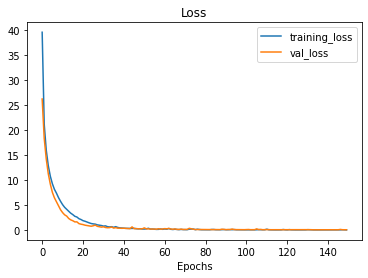

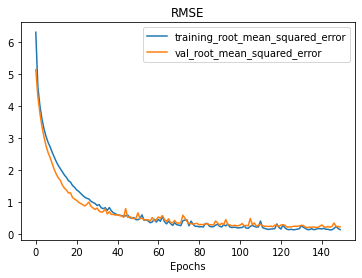

In [125]:
plot_loss_curves(history)

In [126]:
model1.save('model1-96ws-150ep-conv1d')

INFO:tensorflow:Assets written to: model1-96ws-150ep-conv1d/assets


INFO:tensorflow:Assets written to: model1-96ws-150ep-conv1d/assets


In [127]:
model1 = load_model('model1-96ws-150ep-conv1d')

---
# Inference

In [128]:
test_predictions = np.round(model1.predict(X_test), 4)
print(test_predictions[0])
dummy = np.concatenate([[test_predictions[0]]] * win_size_in, axis=0)
test_predictions = np.append(dummy, test_predictions, axis=0)

[ 7.9229  7.0116 11.0466  8.9672 13.0131  8.9416]


In [129]:
df_test['Predict_PM2.5'] = [x for x in test_predictions]

In [130]:
df_test_final = df_test[['SiteId', 'PM2.5', 'Predict_PM2.5']]['2022-10-01 00:00:00':]
df_test_final['Predict_PM2.5'].apply(lambda x: np.round(x, 4))
df_test_final['Predict_PM2.5'] = df_test_final['Predict_PM2.5'].astype(str).str.replace(r'\[|\]|,', '')
df_test_final.reset_index(level=0, inplace=True)
df_test_final.to_csv('Submission_Converge.csv', index=False)
df_test_final

/tmp/ipykernel_1577294/3439553410.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_test_final['Predict_PM2.5'] = df_test_final['Predict_PM2.5'].astype(str).str.replace(r'\[|\]|,', '')


,PublishTime,SiteId,PM2.5,Predict_PM2.5
0,2022-10-01 00:00:00,64,0.0,1.0008 -0.037 -0.0653 -0.0719 1.8823 2.9526
1,2022-10-01 01:00:00,64,0.0,-0.0637 -0.014 -0.0918 1.9356 2.8486 -0.1002
2,2022-10-01 02:00:00,64,1.0,-0.0225 -0.0273 1.9595 2.9819 -0.0836 -0.0868
3,2022-10-01 03:00:00,64,2.0,-0.0898 2.0452 3.0204 -0.0736 -0.187 -0.0578
4,2022-10-01 04:00:00,64,7.0,2.0422 3.0125 0.0585 -0.0259 -0.0548 0.0441
5,2022-10-01 05:00:00,64,7.0,2.9515 0.042 -0.042 -0.0355 -0.1444 0.0399
6,2022-10-01 06:00:00,64,5.0,-0.1041 -0.0967 -0.0849 -0.1993 -0.0477 -0.1393
7,2022-10-01 07:00:00,64,5.0,-0.0637 -0.0642 -0.0987 0.0267 -0.2258 0.2192
8,2022-10-01 08:00:00,64,7.0,-2.000e-04 -2.590e-02 5.800e-03 -5.170e-02 2...
9,2022-10-01 09:00:00,64,7.0,-0.1776 -0.0301 -0.0831 0.2143 4.7807 1.8376


In [131]:
!zip -r model.zip "model1-96ws-150ep-conv1d"

  adding: model1-96ws-150ep-conv1d/ (stored 0%)
  adding: model1-96ws-150ep-conv1d/variables/ (stored 0%)
  adding: model1-96ws-150ep-conv1d/variables/variables.index (deflated 64%)
  adding: model1-96ws-150ep-conv1d/variables/variables.data-00000-of-00001 (deflated 6%)
  adding: model1-96ws-150ep-conv1d/assets/ (stored 0%)
  adding: model1-96ws-150ep-conv1d/keras_metadata.pb (deflated 90%)
  adding: model1-96ws-150ep-conv1d/saved_model.pb (deflated 90%)
